In [50]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import ShuffleSplit, train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from pprint import pprint
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
sns.set_context('notebook')
sns.set_style(style='darkgrid')
%matplotlib inline

In [51]:
#import xgboost as xgb
#from xgboost import XGBClassifier
#print ('XGBoost v', xgb.__version__)


In [52]:
def get_roc(y_test, y_pred):
    #Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', label="ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristics')
    plt.legend(loc='upper left')
    plt.show()
    return



In [53]:
data = pd.read_csv('C:\Harinee\Projects\Capstone inference\Data\creditcard.csv')
data.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


(1) When doing the train/test split, it would be important
to preserver the proportion among the classes in
both sets.

In [54]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)


did the proportion is reflected in the split of 80 and 20

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123, shuffle=True)

In [56]:
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

(3) How did you determine if there is a need to apply regularization with a C value different than 1 (which is the default value for LogisticRegression)?

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[227362     89]
 [   124    270]]
Accuracy: 0.999065153942373
Precision: 0.7520891364902507
Recall: 0.6852791878172588


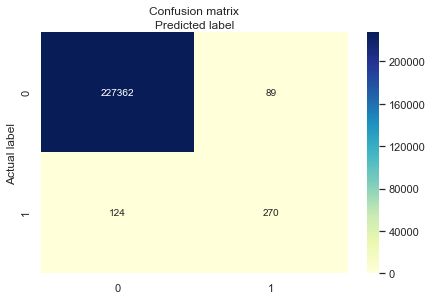

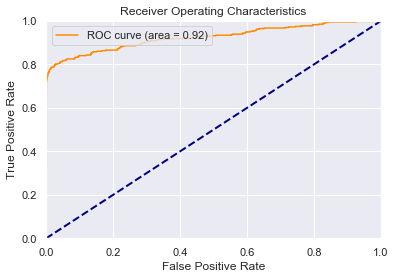

In [62]:
model = LogisticRegression()
model.fit(X_train,y_train)
analyzePredictions(model, X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[56844    20]
 [   39    59]]
Accuracy: 0.9989642217618764
Precision: 0.7468354430379747
Recall: 0.6020408163265306


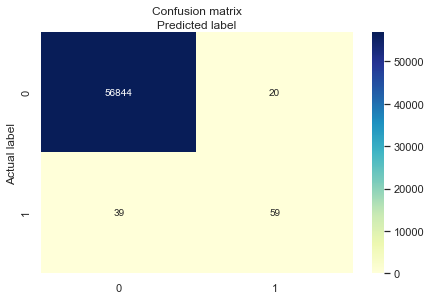

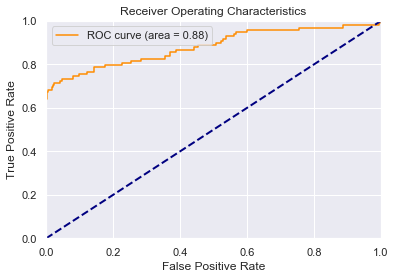

In [63]:
model = LogisticRegression()
model.fit(X_train,y_train)
analyzePredictions(model, X_test, y_test)

(4) If regularization is needed, it would be interesting to
see both L1 and L2 regularization (parameter 'penalty').


 The Model is NOT overfitting. Still run Logistic Regression With A L1 Penalty With Various Regularization Strengths
The usefulness of L1 is that it can push feature coefficients to 0, creating a method for feature selection. In the code below we run a logistic regression with a L1 penalty four times, each time decreasing the value of C. We should expect that as C decreases, more coefficients become 0.

In [57]:
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))
    print('')

C: 10
Coefficient of each feature: [[-3.55563124e-06  8.23337920e-02 -2.03095213e-02 -1.33935128e-02
   6.57260688e-01  1.13475606e-01 -1.04797681e-01 -9.52443500e-02
  -1.68088053e-01 -3.55626068e-01 -8.22961240e-01 -4.84017500e-02
   3.31389017e-02 -2.79938641e-01 -5.57090511e-01 -1.13346246e-01
  -1.13052780e-01 -4.44257650e-02 -1.97866232e-02  1.15730092e-01
  -4.36050051e-01  4.17591203e-01  6.40443965e-01 -4.24016676e-02
   2.36392023e-01 -1.94031308e-01  4.90562805e-02 -8.39768844e-01
  -2.99094588e-01  7.36013351e-04]]
Training accuracy: 0.9985253132612083
Test accuracy: 0.9983497770443454

C: 1
Coefficient of each feature: [[-3.48798343e-06  7.23714506e-02 -1.95557112e-02 -1.07338055e-02
   6.39850308e-01  1.08900704e-01 -9.66980273e-02 -8.76545680e-02
  -1.69002048e-01 -3.40886627e-01 -7.88988801e-01 -3.59731540e-02
   9.25783210e-03 -2.63933983e-01 -5.53487387e-01 -1.06901433e-01
  -1.20244752e-01 -4.32072330e-02 -8.95780016e-03  1.04938168e-01
  -4.08131907e-01  4.01772694e

In [58]:
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))
    print('')

C: 10
Coefficient of each feature: [[-8.94549492e-05  1.97945300e-01 -3.64664126e-01 -8.61960105e-01
   1.58735680e-01 -5.14909084e-02 -7.35502988e-02  9.86330941e-02
  -1.83581205e-01 -4.10982500e-01 -2.45477956e-01 -1.61185372e-01
  -6.15540679e-02 -2.69335138e-01 -7.85484105e-01 -2.71710949e-01
  -3.08136772e-01 -5.24778367e-01 -1.64287697e-02  6.07515605e-02
   6.17315951e-02  1.80028133e-01  2.27952593e-01  4.39481219e-02
  -2.99681458e-02 -2.06601237e-01  3.58380569e-02 -6.03006269e-02
   3.86275464e-02 -7.13067795e-03]]
Training accuracy: 0.8223485264104984
Test accuracy: 0.8215125873389277

C: 1
Coefficient of each feature: [[-8.94481317e-05  1.97857344e-01 -3.64574314e-01 -8.61712755e-01
   1.58700484e-01 -5.14609242e-02 -7.35311976e-02  9.86447918e-02
  -1.83550551e-01 -4.10825002e-01 -2.45395599e-01 -1.61130396e-01
  -6.15682961e-02 -2.69228594e-01 -7.85234636e-01 -2.71654640e-01
  -3.08031107e-01 -5.24579907e-01 -1.64030885e-02  6.07253278e-02
   6.17099745e-02  1.79975582e

So, Now number of coefficients with zero values is zero. So, now it is clear that Ridge regularisation (L2 Regularisation) does not shrink the coefficients to zero.

In [59]:
#This displays a sample confusion matrix and ROC
def analyzePredictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    #------------------------------
    drawConfusionMatrix(cnf_matrix)
    #-----------------------------------------
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    #------------------------------------------
    y_pred_proba = model.predict_proba(X_test)[:,1]
    get_roc(y_test, y_pred_proba)

Logistic Regression
[[56852    12]
 [   39    59]]


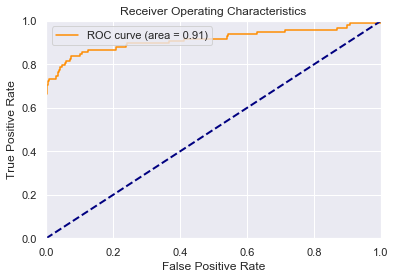

In [64]:
#Logistic Regression
#Use Logistic Regression using the train data, then compute the confusion matrix and the AUC.
from sklearn.linear_model import LogisticRegression
print ("Logistic Regression")
def logregclf(X_train, y_train, X_test, y_test):
    model = LogisticRegression(solver='lbfgs', max_iter=500, C=10).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    y_pred_proba = model.predict_proba(X_test)[:,1]
    get_roc(y_test, y_pred_proba)
    return
logregclf(X_train, y_train, X_test, y_test)